In [30]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras.optimizers import SGD

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3),padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)      

In [32]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)      

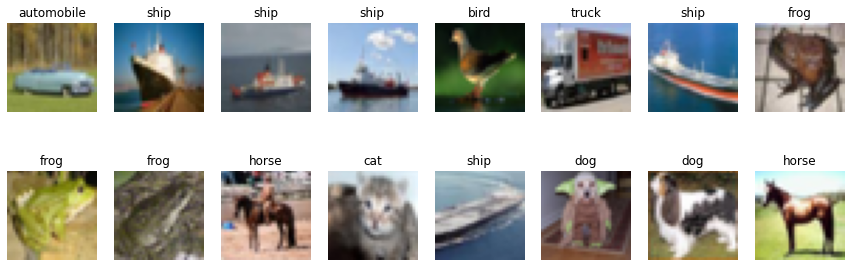

In [33]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

#print (train_images.shape)
train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(test_labels),dtype=int)
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(test_images[random_index, :])
        for ii in range(0,10):
          if(test_labels[random_index][ii]==1):
            k=ii
            break
        true_label = cifar10_classes[k]
        ax.set_title("{}".format(
               true_label
        ))
plt.show()

In [34]:
from keras.preprocessing.image import ImageDataGenerator
# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(train_images)

In [35]:
batch_size = 32
epochs = 100
lrate=0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


Epoch 1/100
391/390 [==============================] - 39s 101ms/step - loss: 1.6803 - accuracy: 0.4123 - val_loss: 1.4158 - val_accuracy: 0.5025
Epoch 2/100
391/390 [==============================] - 37s 96ms/step - loss: 1.2510 - accuracy: 0.5526 - val_loss: 1.2159 - val_accuracy: 0.5709
Epoch 3/100
391/390 [==============================] - 38s 96ms/step - loss: 1.0716 - accuracy: 0.6174 - val_loss: 0.9737 - val_accuracy: 0.6659
Epoch 4/100
391/390 [==============================] - 38s 96ms/step - loss: 0.9508 - accuracy: 0.6628 - val_loss: 0.8583 - val_accuracy: 0.7005
Epoch 5/100
391/390 [==============================] - 37s 96ms/step - loss: 0.8604 - accuracy: 0.6943 - val_loss: 0.8489 - val_accuracy: 0.7102
Epoch 6/100
391/390 [==============================] - 37s 95ms/step - loss: 0.7900 - accuracy: 0.7200 - val_loss: 0.8857 - val_accuracy: 0.7009
Epoch 7/100
391/390 [==============================] - 37s 96ms/step - loss: 0.7447 - accuracy: 0.7366 - val_loss: 0.8533 - val_a

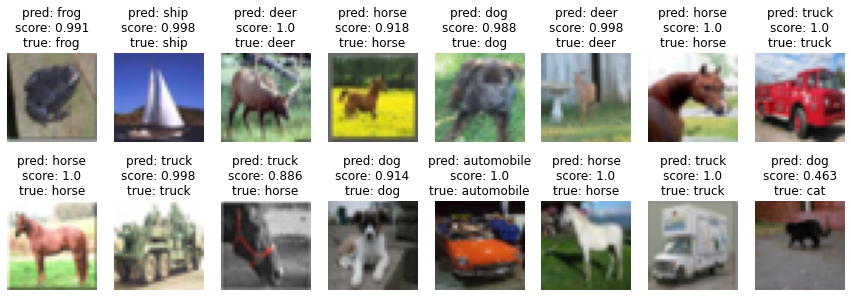

In [36]:
model.fit_generator(datagen.flow(train_images, train_labels, batch_size=128),
                    steps_per_epoch = len(train_images) / 128, epochs=100, validation_data=(test_images, test_labels))


cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
y_pred_test = model.predict_proba(test_images)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)
#print(test_labels[0])
#print(len(test_labels))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(test_labels),dtype=int)
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(test_images[random_index, :])
        pred_label =  cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        #print(test_labels[random_index])
        k=0
        for ii in range(0,10):
          if(test_labels[random_index][ii]==1):
            k=ii
            break
        true_label = cifar10_classes[k]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 222us/step
Test loss: 0.4142258606731892
Test accuracy: 0.8813999891281128
